### Ch4 Figure1

In [1]:
# In this example let's say that the representative added up the income of every family. Then they divided it by the total number of families. Sure enough each family earned about $5000 more.

# generate data
from scipy.stats import chi2

def chi_dist(k):
    dist = chi2(k)
    x = np.linspace(0, 20, 1000) 
    y = dist.pdf(x) * 10000
    med = k * ((1- (2/(9*k))) ** 3)
    return k, med, x, y

def rev_chi_dist(k):
    dist = chi2(k)
    x = np.linspace(0, 20, 1000) 
    y = dist.pdf(x) * 10000
    y = y[::-1]
    med = 20-(k * ((1- (2/(9*k))) ** 3))
    return (20-k), med, x, y

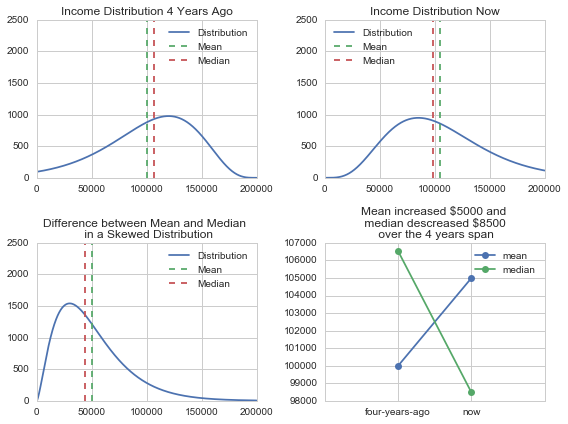

In [2]:
%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(2,2, figsize=(8,6))

def draw_chi(chi, k, ax):
    offset=10000
    k, med, x, y = chi(k)
    ax.plot(x*offset, y);
    # ax.set_title('Income Distribution \n (chi-squared w/ k=%i, mu=0)' %k);
    ax.plot((k*offset, k*offset), (0, 2500), '--'); # mean
    ax.plot((med*offset, med*offset), (0, 2500), '--'); # median
    ax.set_ylim(0,2500);
    ax.legend(['Distribution', 'Mean', 'Median']);
    
    return k*offset, med*offset

draw_chi(chi_dist, 5, ax[1][0])
ax[1][0].set_title('Difference between Mean and Median \n in a Skewed Distribution')

avg0, med0 = draw_chi(rev_chi_dist, 10, ax[0][0])
ax[0][0].set_title('Income Distribution 4 Years Ago')
avg1, med1 = draw_chi(chi_dist, 10.5, ax[0][1])
ax[0][1].set_title('Income Distribution Now')
ax[0][1].legend(['Distribution', 'Mean', 'Median'], loc='upper left')

ax[1][1].plot([None, avg0, avg1, None], 'o-')
ax[1][1].plot([None, med0, med1, None], 'o-')
ax[1][1].set_xticks([0,1,2,3])
ax[1][1].set_xticklabels(['', 'four-years-ago', 'now', '']) 
ax[1][1].legend(['mean', 'median'])
ax[1][1].set_title('Mean increased $5000 and \n median descreased $8500 \n over the 4 years span')
ax[0][0].ticklabel_format(useOffset=False)
f.tight_layout()

f.savefig('svg_output/ch4_fig1.svg', format='svg')